In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [2]:
# Carregar datasets como CSV
dataset = pd.read_csv('dataset.csv')
features = pd.read_csv('just_features.csv')

In [3]:
# Visualizar os dados carregados
print("Dataset:")
print(dataset.head())
print("\nJust Features:")
print(features.head())

Dataset:
      genero estado_civil zona_residencia   imc fumador       class_etaria  \
0  masculino       casado       suburbana  35.8     sim  adulto_meia_idade   
1   feminino     separado          urbana  39.3     nao      adulto_senior   
2  masculino     solteiro           rural  40.7     nao              jovem   
3  masculino       casado          urbana  28.2     sim  adulto_meia_idade   
4   feminino     solteiro          urbana  31.1     nao      adulto_senior   

     custo  
0  18213.9  
1   4266.4  
2    854.6  
3  10169.7  
4   4151.5  

Just Features:
      genero estado_civil zona_residencia   imc fumador       class_etaria
0   feminino       casado       suburbana  25.6     sim  adulto_meia_idade
1   feminino       casado       suburbana  23.1     sim      adulto_senior
2  masculino     solteiro       suburbana  26.3     nao        adolescente
3   feminino     solteiro       suburbana  27.0     nao        adolescente
4   feminino       casado           rural  32.6     n

In [4]:
# Separar features e target
X = dataset.drop(columns=['custo'])
y = dataset['custo']

In [5]:
# Identificar colunas categóricas e numéricas
categorical_features = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']
numerical_features = ['imc']

In [6]:
# Configurar transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [7]:
# Criar o preprocessador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
# Pipeline do modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [9]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Configurar GridSearch para otimização
param_grid = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__gamma': ['scale', 'auto']
}

In [ ]:
# Ajustar hiperparâmetros
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', verbose=2)
print("Treinando o modelo...")
grid_search.fit(X_train, y_train)

Treinando o modelo...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=rbf; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regressor__kernel=rbf; total time=   0.0s
[CV] END regressor__C=0.1, regressor__epsilon=0.1, regressor__gamma=scale, regress

In [24]:
# Melhor modelo
best_model = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

Melhores hiperparâmetros: {'regressor__C': 100, 'regressor__epsilon': 0.2, 'regressor__gamma': 'scale', 'regressor__kernel': 'linear'}


In [25]:
# Avaliação do modelo
y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R² Score: {score}")

R² Score: 0.21302382660974828


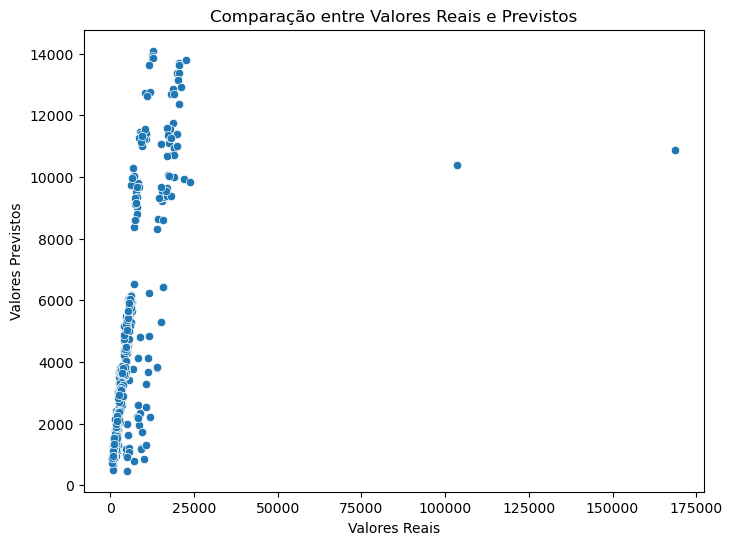

In [26]:
# Visualizar comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Comparação entre Valores Reais e Previstos")
plt.show()

In [27]:
# Prever novos dados e salvar resultados
predictions = best_model.predict(features)
predictions_df = pd.DataFrame(predictions, columns=['custo'])
predictions_df.to_csv('grupo#_custos_estimados.csv', index=False)
print("Predições salvas no arquivo 'grupo#_custos_estimados.csv'")

Predições salvas no arquivo 'grupo#_custos_estimados.csv'
